# Step by step KNN

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# ---------------------------- 1. Simulierte Beispieldaten ----------------------------
# Zwei Merkmale: Gewicht (Merkmal1) und Geschwindigkeit (Merkmal2)
merkmal1 = np.array([55, 80, 45, 70, 65, 50, 85, 60, 75, 90])  # Gewicht
merkmal2 = np.array([20, 35, 15, 30, 25, 18, 40, 22, 28, 38])  # Geschwindigkeit
klassen = np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1])             # Zielklassen: 0 oder 1

# Kombiniere die Merkmale zu einem Datensatz
daten = np.column_stack((merkmal1, merkmal2))


In [7]:
# ---------------------------- 2. Normalisierung mit Min-Max ----------------------------
# Wir bringen die Daten auf einen Bereich von 0 bis 1

min_vals = daten.min(axis=0)
max_vals = daten.max(axis=0)
daten_norm = (daten - min_vals) / (max_vals - min_vals)

# Anfragepunkt (z.B. ein neuer Roboter mit Gewicht 65 und Geschwindigkeit 29)
anfrage = np.array([65, 29])
anfrage_norm = (anfrage - min_vals) / (max_vals - min_vals)


In [15]:
# ---------------------------- 3. Manuelle KNN-Funktion über k = 1...9 ----------------------------
ks = range(1, 10)
klassen_ids = sorted(set(klassen))
wahrscheinlichkeiten = {c: [] for c in klassen_ids}

# Berechne die Distanz zu allen Punkten (euklidisch)
distanzen = [np.linalg.norm(p - anfrage_norm) for p in daten_norm]
paare = list(zip(distanzen, klassen))
paare.sort(key=lambda x: x[0])  # Sortiere nach Distanz (nächste Nachbarn zuerst)

# Berechne für jedes k die Klassenwahrscheinlichkeiten
for k in ks:
    nachbarn = paare[:k]
    labels = [label for _, label in nachbarn]
    zaehler = Counter(labels)
    for c in klassen_ids:
        anteil = zaehler[c] / k if c in zaehler else 0.0
        wahrscheinlichkeiten[c].append(anteil)

print("Distanzen", distanzen)
print("wahrscheinlichkeiten", wahrscheinlichkeiten)

Distanzen [0.42306348938354715, 0.4107445813533164, 0.7149341677368141, 0.11809182449410155, 0.16000000000000003, 0.5520064411862521, 0.6254045604227161, 0.30124023471698747, 0.22579352526009844, 0.6619984707751537]
wahrscheinlichkeiten {0: [0.0, 0.0, 0.0, 0.25, 0.2, 0.3333333333333333, 0.42857142857142855, 0.375, 0.3333333333333333], 1: [1.0, 1.0, 1.0, 0.75, 0.8, 0.6666666666666666, 0.5714285714285714, 0.625, 0.6666666666666666]}


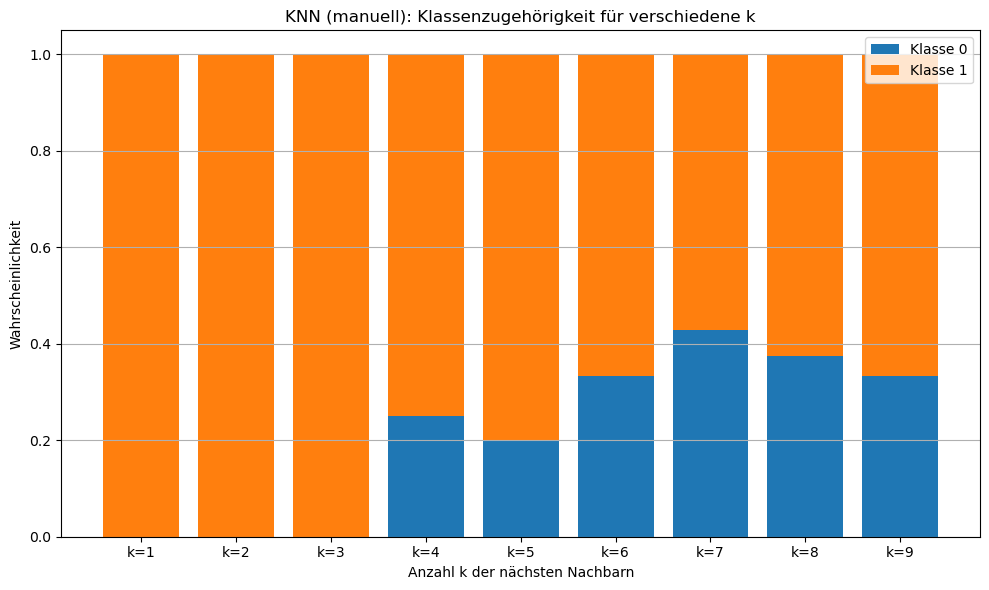

In [9]:
# ---------------------------- 4. Visualisierung: Gestapeltes Balkendiagramm ----------------------------
x = np.arange(len(ks))
bar_width = 0.8
bottom = np.zeros(len(ks))

plt.figure(figsize=(10, 6))
for c in klassen_ids:
    plt.bar(x, wahrscheinlichkeiten[c], bar_width, bottom=bottom, label=f'Klasse {c}')
    bottom += wahrscheinlichkeiten[c]

plt.xticks(x, [f'k={k}' for k in ks])
plt.xlabel('Anzahl k der nächsten Nachbarn')
plt.ylabel('Wahrscheinlichkeit')
plt.title('KNN (manuell): Klassenzugehörigkeit für verschiedene k')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# SKLEARN KNN

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Skaliere die Daten mit sklearn
scaler = MinMaxScaler()
daten_sklearn = scaler.fit_transform(daten)
anfrage_sklearn = scaler.transform([anfrage])

# Liste der Wahrscheinlichkeiten pro k
wahrscheinlichkeiten_sklearn = []

# Für jedes k trainieren und Wahrscheinlichkeiten berechnen
for k in ks:
    modell = KNeighborsClassifier(n_neighbors=k)
    modell.fit(daten_sklearn, klassen)
    probs = modell.predict_proba(anfrage_sklearn)[0]
    wahrscheinlichkeiten_sklearn.append(probs)

# Transponieren für gestapelte Balken
wahrscheinlichkeiten_sklearn = np.array(wahrscheinlichkeiten_sklearn).T


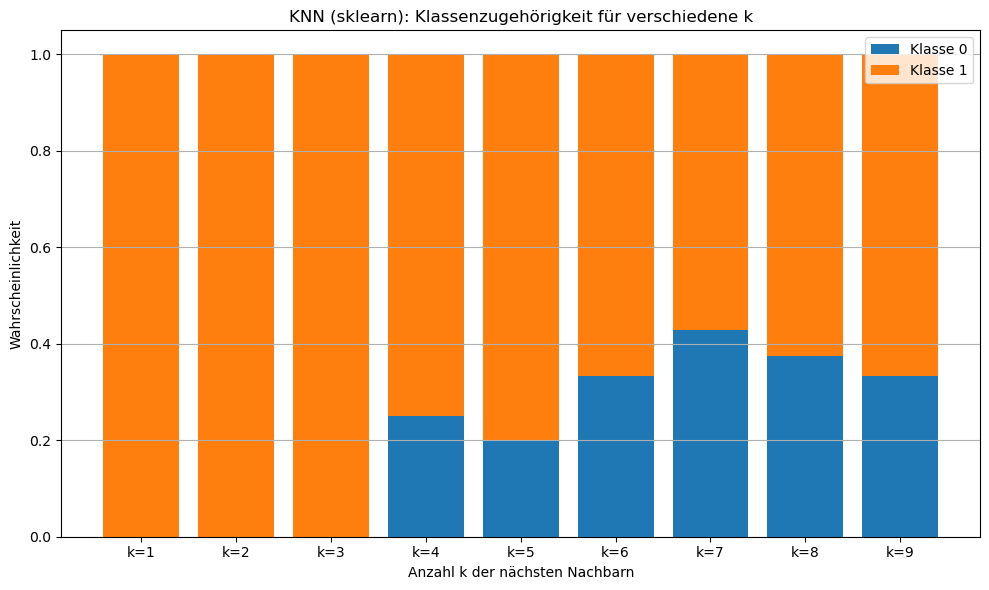

In [11]:
# ---------------------------- 6. Visualisierung sklearn-KNN ----------------------------
bottom = np.zeros(len(ks))

plt.figure(figsize=(10, 6))
for i, c in enumerate(klassen_ids):
    plt.bar(x, wahrscheinlichkeiten_sklearn[i], bar_width, bottom=bottom, label=f'Klasse {c}')
    bottom += wahrscheinlichkeiten_sklearn[i]

plt.xticks(x, [f'k={k}' for k in ks])
plt.xlabel('Anzahl k der nächsten Nachbarn')
plt.ylabel('Wahrscheinlichkeit')
plt.title('KNN (sklearn): Klassenzugehörigkeit für verschiedene k')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
